<a href="https://colab.research.google.com/github/subhayuroy/Melody_Synthesis/blob/main/musicAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install librosa

In [ ]:
import librosa
audio_data = '/content/Test_Audio.mp3'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(94316,) 22050


In [ ]:
librosa.load(audio_data, sr=44100)

(array([-6.2426478e-03, -6.0658096e-03, -4.9178000e-03, ...,
        -2.3266051e-05, -1.3288871e-05, -4.5128440e-06], dtype=float32), 44100)

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_data)

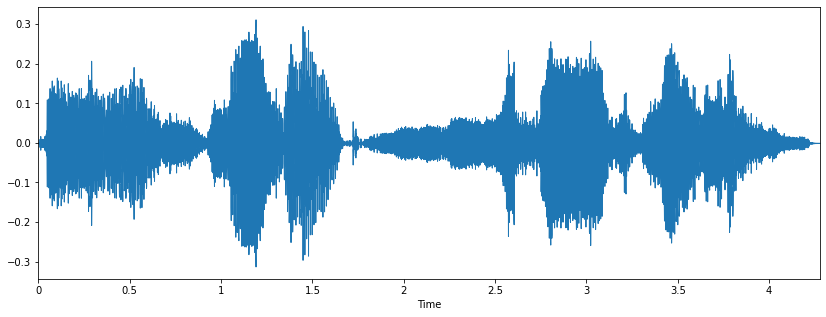

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

###Spectrogram

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

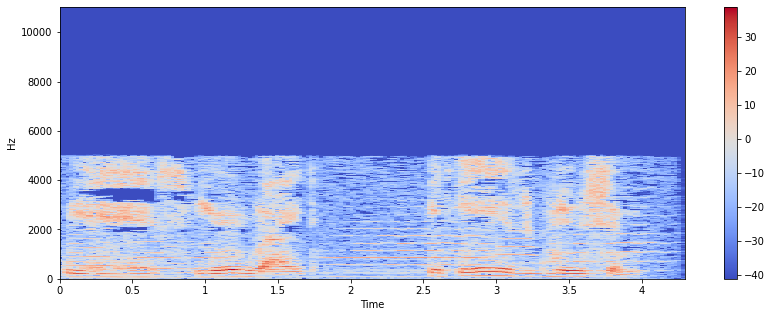

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

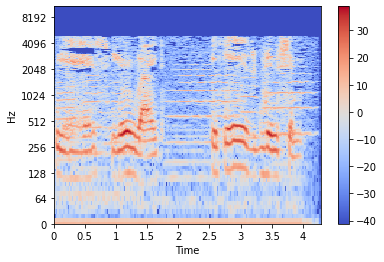

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

***Creating an Audio Signal***

In [ ]:
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array
#Saving the audio
librosa.output.write_wav('tone_220.wav', x, sr)

##Feature Extraction from Audio signal

###Spectral Centroid

The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located.

In [ ]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(185,)

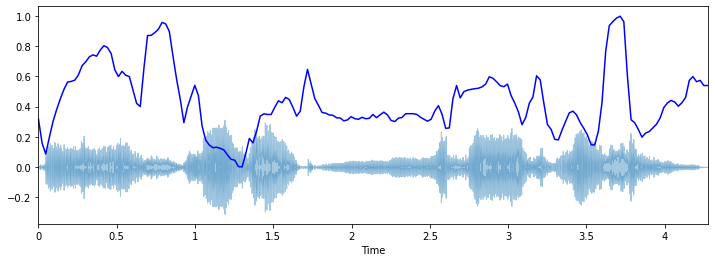

In [ ]:
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

###Spectral Rolloff

It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0. To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.

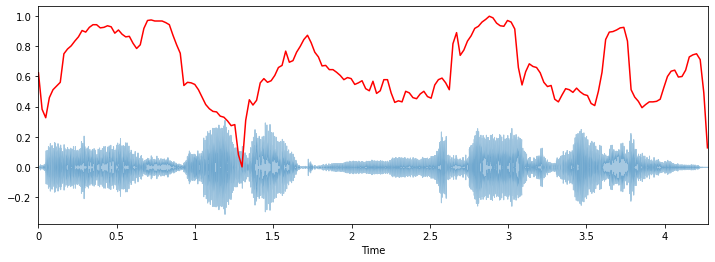

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

###Spectral Bandwidth

The spectral bandwidth is defined as the width of the band of light at one-half the peak maximum (or full width at half maximum [FWHM]) and is represented by the two vertical red lines and λSB on the wavelength axis.

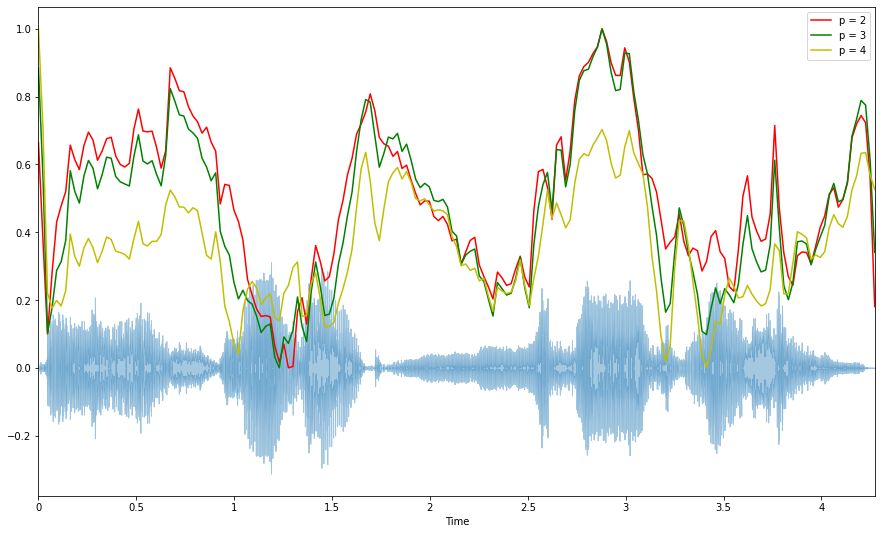

In [ ]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

###Zero-Crossing Rate

A very simple way for measuring the smoothness of a signal is to calculate the number of zero-crossing within a segment of that signal. A voice signal oscillates slowly — for example, a 100 Hz signal will cross zero 100 per second — whereas an unvoiced fricative can have 3000 zero crossings per second.

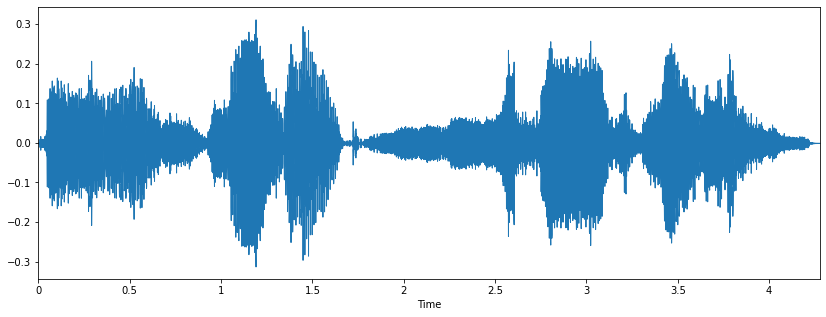

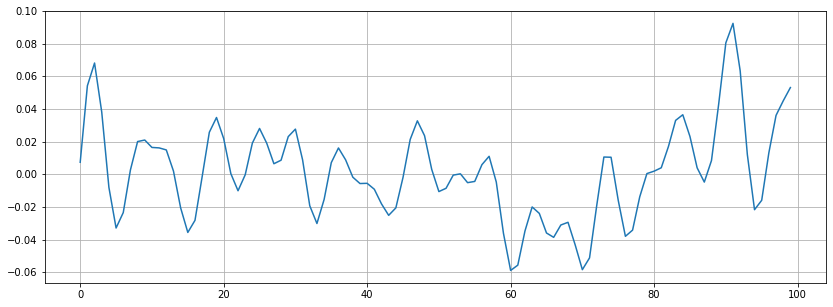

In [ ]:
x, sr = librosa.load('/content/Test_Audio.mp3')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

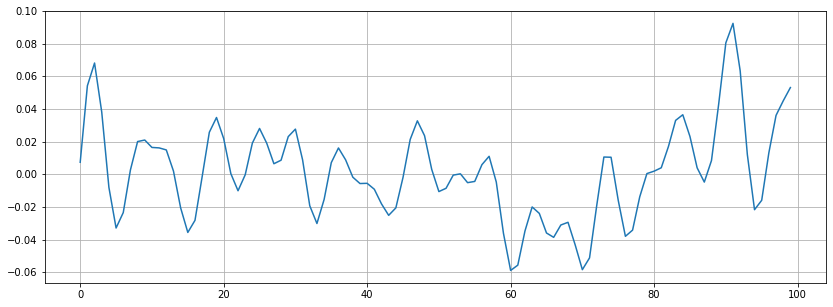

In [ ]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [ ]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

22


###Mel-Frequency Cepstral Coefficients(MFCCs)

The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

(20, 185)


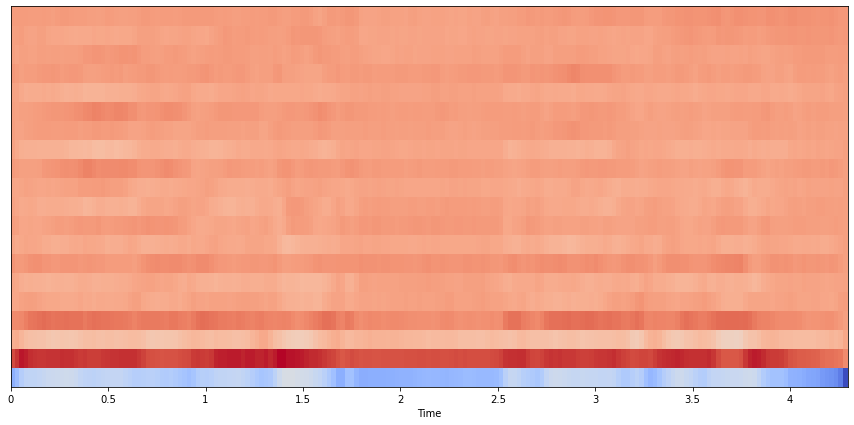

In [ ]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

###Chroma feature

A chroma feature or vector is typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, …, B}, is present in the signal. In short, It provides a robust way to describe a similarity measure between music pieces.

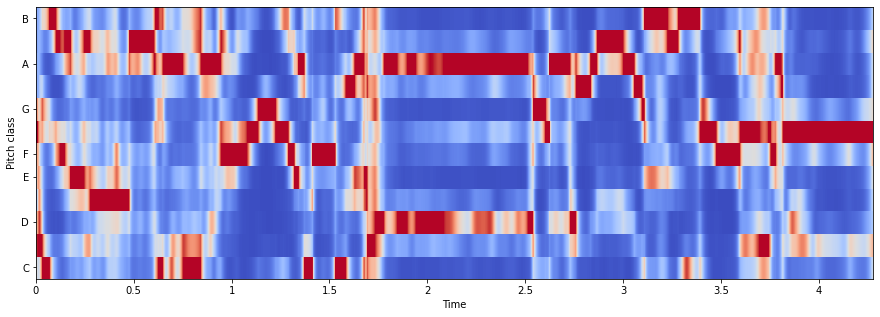

In [ ]:
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=12)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=12, cmap='coolwarm')

#Music genre classification using ANN

In [1]:
import requests 

def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

url = input("Enter the URL of Dataset = ")
save_path = input("Enter the path of file to save the Dataset = ")

download_url(url=url, save_path=save_path)

Enter the URL of Dataset = http://opihi.cs.uvic.ca/sound/genres.tar.gz
Enter the path of file to save the Dataset = /content/Music.tar.gz


In [2]:
%%capture
!tar -xf Music.tar.gz 

This dataset was used for the well-known paper in genre classification “Musical genre classification of audio signals” by G. Tzanetakis and P. Cook in IEEE Transactions on Audio and Speech Processing 2002.

The dataset consists of 1000 audio tracks each 30 seconds long. It contains 10 genres, each represented by 100 tracks. The tracks are all 22050 Hz monophonic 16-bit audio files in .wav format.

***Import all the required libraries***

In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from keras import layers
import keras
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

***Now convert the audio data files into PNG format images or basically extracting the Spectrogram for every Audio***

In [ ]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'/content/genres/{g}'):
        songname = f'/content/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 576x576 with 0 Axes>

***Sample spectrogram of a song having genre as blues***

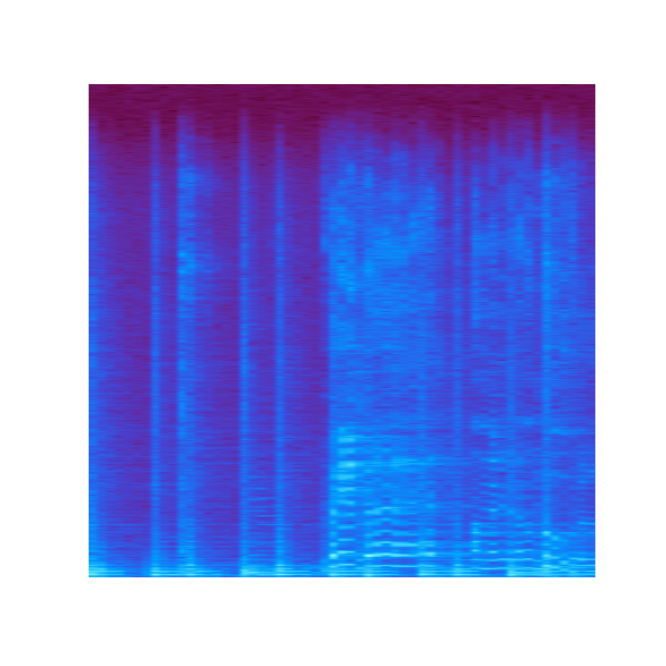

In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv

Img = cv.imread('/content/img_data/blues/blues00001.png')
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(Img, cmap='inferno')

***Creating a header for our CSV file***

In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

***Extracting features from Spectrogram: We will extract Mel-frequency cepstral coefficients (MFCC), Spectral Centroid, Zero Crossing Rate, Chroma Frequencies, and Spectral Roll-off***

In [ ]:
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'/content/genres/{g}'):
        songname = f'/content/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rmse(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

***Data preprocessing: It involves loading CSV data, label encoding, feature scaling and data split into training and test set***

In [ ]:
data = pd.read_csv('dataset.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

###Building an ANN model

In [ ]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

***Fit the model***

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
7/7 [==============================] - 0s 4ms/step - loss: 2.2691 - accuracy: 0.1654
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 1.9484 - accuracy: 0.3463
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 1.7355 - accuracy: 0.3817
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 1.5089 - accuracy: 0.4763
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 1.3405 - accuracy: 0.5523
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 1.2571 - accuracy: 0.5658
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 1.1262 - accuracy: 0.6352
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 1.0444 - accuracy: 0.6613
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 1.0148 - accuracy: 0.6425
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.9096 - accuracy: 0.7109
Epoch 11/100
7/7 [===========

Minimum validation loss: 0.22499999403953552


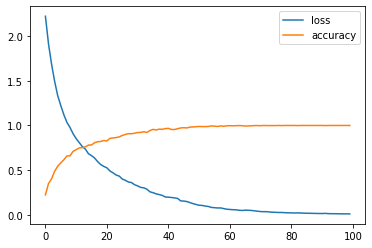

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'accuracy']].plot();
print("Minimum validation loss: {}".format(history_df['accuracy'].min()))

<h1>Convolutional Neural Network implementation</h1>

In [3]:
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
%matplotlib inline

import librosa
import librosa.display
import IPython.display
import random
import warnings
import os
from PIL import Image
import pathlib
import csv

from sklearn.model_selection import train_test_split

import keras
import warnings
warnings.filterwarnings('ignore')
from keras import layers
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling1D, AveragePooling2D, Input, Add
from keras.models import Sequential
from keras.optimizers import SGD

In [ ]:
cmap = plt.get_cmap('inferno')
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
    for filename in os.listdir(f'/content/genres/{g}'):
        songname = f'/content/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        print(y.shape)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'/content/img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

###Split data by 80% in training and 20% in the test set

In [7]:
import splitfolders

splitfolders.ratio('/content/img_data/', output="./data", seed=1337, ratio=(.8, .2))

Copying files: 1000 files [00:00, 4198.07 files/s]


###Image Augmentation

In [8]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255, 
        shear_range=0.2, 
        zoom_range=0.2,
        horizontal_flip=True)  
horiztest_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
training_set = train_datagen.flow_from_directory(
        '/content/data/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)
test_set = train_datagen.flow_from_directory(
        '/content/data/val',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle = False )

Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


###Create a Convolutional Neural Network

In [11]:
model = Sequential()
input_shape=(64, 64, 3)
model.add(Conv2D(32, (3, 3), strides=(2, 2), input_shape=input_shape))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(AveragePooling2D((2, 2), strides=(2,2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dropout(rate=0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 32)        896       
_________________________________________________________________
average_pooling2d (AveragePo (None, 15, 15, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          3

###Compile/train the network using Stochastic Gradient Descent(SGD)

In [12]:
epochs = 200
batch_size = 8
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.9
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=['accuracy'])

In [15]:
model.fit_generator(
            training_set,
            steps_per_epoch=25,
            epochs=50,
            validation_data=test_set,
            validation_steps=200)

Epoch 1/50
25/25 [==============================] - 8s 320ms/step - loss: 2.3247 - accuracy: 0.0862 - val_loss: 2.3019 - val_accuracy: 0.0850
Epoch 2/50
25/25 [==============================] - 6s 248ms/step - loss: 2.3167 - accuracy: 0.0700
Epoch 3/50
25/25 [==============================] - 6s 253ms/step - loss: 2.3172 - accuracy: 0.0587
Epoch 4/50
25/25 [==============================] - 6s 253ms/step - loss: 2.3112 - accuracy: 0.0650
Epoch 5/50
25/25 [==============================] - 6s 249ms/step - loss: 2.3117 - accuracy: 0.0625
Epoch 6/50
25/25 [==============================] - 6s 249ms/step - loss: 2.3099 - accuracy: 0.0600
Epoch 7/50
25/25 [==============================] - 6s 253ms/step - loss: 2.3094 - accuracy: 0.0525
Epoch 8/50
25/25 [==============================] - 6s 251ms/step - loss: 2.3100 - accuracy: 0.0688
Epoch 9/50
25/25 [==============================] - 6s 249ms/step - loss: 2.3091 - accuracy: 0.0613
Epoch 10/50
25/25 [==============================] - 6s 24

###Model evaluation

In [19]:
model.evaluate_generator(generator=test_set, steps=50)

[2.2104439735412598, 0.17499999701976776]

Loss is 2.21 and Accuracy is 17.49%

In [33]:
test_set.reset()
pred = model.predict_generator(test_set, steps=7, verbose=1)

7/7 [==============================] - 2s 219ms/step


In [34]:
predicted_class_indices=np.argmax(pred,axis=1)

labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
predictions = predictions[:200]
filenames=test_set.filenames

In [39]:
print(str(len(filenames))+", "+ str(len(predictions)))

200, 200


###Save the results to a CSV file

In [40]:
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("prediction_results.csv",index=False)

In [42]:
file_path = '/content/prediction_results.csv'
out = pd.read_csv(file_path)
out.head()

,Filename,Predictions
0,blues/blues00013.png,metal
1,blues/blues00021.png,jazz
2,blues/blues00026.png,jazz
3,blues/blues00039.png,jazz
4,blues/blues00042.png,metal
